In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Igor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Igor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv("df_to_train.csv")
df['Total_Review'] = df['Total_Review'].fillna('')

df.review_type = df['review_type'].map({'positive': 1, 'neutral': 0, 'negative': -1})
df.review_type.value_counts()

review_type
 1    10728
 0    10728
-1    10728
Name: count, dtype: int64

In [3]:
reviews = df.Total_Review
sentiment = df.review_type

In [4]:
def text_preprocessing(text):
  stop_words = set(stopwords.words('english')) 
  stemmer = PorterStemmer(PorterStemmer.ORIGINAL_ALGORITHM)
  
  tokens = word_tokenize(text)
  splitted_words_without_stops = [word for word in tokens if not word in stop_words]
  splitted_words_without_puncs = [word for word in splitted_words_without_stops  if word.isalnum()] 
  stemmed_words = [stemmer.stem(word) for word in splitted_words_without_puncs]

  return ' '.join(stemmed_words)

In [5]:
X = reviews
Y = sentiment
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.30, random_state=42)
print(len(X_test))
print(type(X_test))

9656
<class 'pandas.core.series.Series'>


# Bag of Words Feature Extractor

In [6]:
feature_extractor = CountVectorizer(lowercase=False, preprocessor=text_preprocessing)

# NB Training

In [7]:
pipe_NB = Pipeline([
    ('feature_extractor', feature_extractor),
    ('Naive_bayes', MultinomialNB())
])

pipe_NB.fit(X_train, y_train)
NB_predicted_training = pipe_NB.predict(X_train)

NB_training_acc = (metrics.accuracy_score(y_train, NB_predicted_training))*100
print('The training accuracy:',NB_training_acc,'% accuracy')

The training accuracy: 79.66974431818183 % accuracy


# NB Testing

In [8]:
NB_predicted_testing = pipe_NB.predict(X_test)

NB_testing_acc = (metrics.accuracy_score(y_test, NB_predicted_testing))*100
print('The test accuracy:',NB_testing_acc,'% accuracy')

The test accuracy: 75.24855012427506 % accuracy


In [9]:
print(classification_report(y_test, NB_predicted_testing))

              precision    recall  f1-score   support

          -1       0.72      0.72      0.72      3186
           0       0.70      0.67      0.68      3226
           1       0.83      0.87      0.85      3244

    accuracy                           0.75      9656
   macro avg       0.75      0.75      0.75      9656
weighted avg       0.75      0.75      0.75      9656



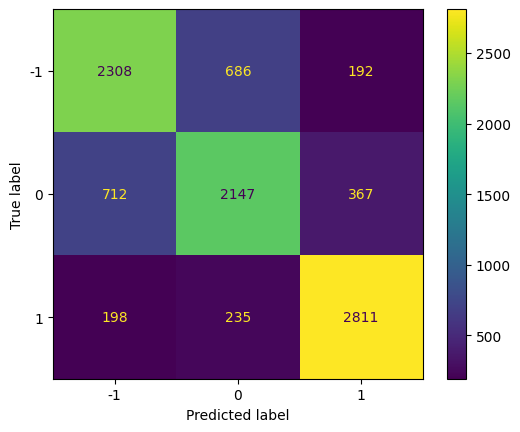

In [10]:
cm = confusion_matrix(y_test, NB_predicted_testing, labels=pipe_NB.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe_NB.classes_)
disp.plot()
plt.show()

In [13]:
import pickle

with open('naive_bayes_model.pkl', 'wb') as f:
    pickle.dump(pipe_NB, f)
